# Importando bibliotecas

In [1]:
import numpy as np         # para fazer contas e mexer com matrizes
import pandas as pd        # para montar DataFrames (tabelas de bancos de dados)

import matplotlib.pyplot as plt
import seaborn as sns

import modelos as m
from scipy.optimize import curve_fit   # para ajuste das curvas dos modelos

# CUIDADO!!! Para esconder os avisos do curvefit():
import warnings
warnings.filterwarnings("ignore")

In [2]:
# para não precisar reiniciar o kernel do jupyter-notebook quando mudar os arquivos .py
%load_ext autoreload
%autoreload 2

In [3]:
sns.set_theme()

# Simulando uma curva

## Testando modelo *sigmoidvenegas1*

Simulando curva com modelo *sigmoid_recruit_units* e tentando ajustar o modelo *sigmoidvenegas1*.<br>
Nenhum parâmetro do modelo do Venegas parece  ter relação com a constante *K* das exponenciais.

In [4]:
p = np.array(range(-10,50))
param = [0.02,1000,20,10,-200] # K,Vmax,mi,sigma,offset
v = m.sigmoid_recruit_units(p,*param)

In [11]:
modelo = m.sigmoidvenegas1
Vmin =  500 # mL
Vmax = 3500 # mL
bounds = ([  -500, Vmin,   20,      5],
          [   200, Vmax,   40,     18])

[-215.21448113  655.61859464   27.3517997     7.31375689]


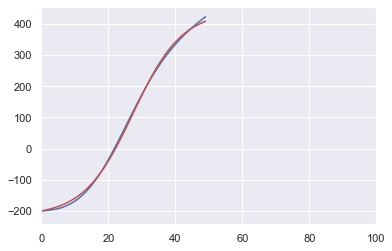

In [6]:
parameters, pcov = curve_fit(modelo, p, v, method='trf',bounds=bounds)
v_fit = modelo(p,*parameters)
plt.plot(p,v,'b')
plt.plot(p,v_fit,'r')
plt.xlim((0,100))
print(parameters)

Tentando ajustar o modelo exponencial no final da curva sigmoide.<br>
Parece também não ser possível estimar a constante *K* desse modo.

In [7]:
def expsalazaroffset(x,Vo,K,of):
    return Vo*(1-np.exp(-K*x))+of

In [8]:
p_inicio = parameters[2]+3*parameters[3]
p_ven = np.array(range(int(p_inicio),200))
v_ven = m.sigmoidvenegas1(p_ven,*parameters)
modelo = expsalazaroffset
bounds_sal = ([50,0.001,-1000],[30000,1,1000])
parameters2, pcov2 = curve_fit(modelo, p_ven, v_ven, method='trf',bounds=bounds_sal)
print(parameters2)

[ 1.44083802e+03  8.22523343e-02 -1.00000000e+03]


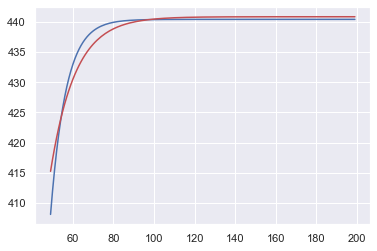

In [9]:
v_sal = expsalazaroffset(p_ven,*parameters2)
plt.plot(p_ven,v_ven,'b')
plt.plot(p_ven,v_sal,'r')

## Testando modelo *sigmoidvenegas2offset*

Constante *K* é dada por <code>parameters[2]</code>.<br>
Com poucos pontos, modelo *sigmoidvenegas2offset* tende a superestimar *K*.

In [73]:
intervalo = 5
p = np.array(range(0,70,intervalo))
param = [0.05,1000,20,10,-200] # K,Vmax,mi,sigma,offset
v = m.sigmoid_recruit_units(p,*param)

In [74]:
modelo = m.sigmoidvenegas2offset
Vmin =  500 # mL
Vmax = 3500 # mL
p0 =      [  2000,    2000,    0.05,      28,       7,    -200] # TLC,B,k,c,d,offset
bounds = ([  Vmin,       0,       0,      15,       4,    -500],
          [  Vmax,    Vmax,       1,      40,      15,     200])

[ 9.67808826e+02  1.23739921e+03  6.40398901e-02  2.03849802e+01
  6.85046035e+00 -1.87966753e+02]
K simulado: 0.05; K estimado: 0.06403989006680383


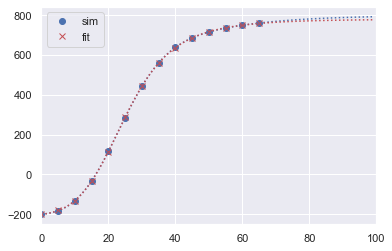

In [75]:
parameters, pcov = curve_fit(modelo, p, v, method='trf',bounds=bounds, p0=p0)
v_fit = modelo(p,*parameters)
plt.plot(p,v,'bo',label='sim')
plt.plot(p,v_fit,'rx',label='fit')
p_sim = np.array(range(0,100))
v_sim = m.sigmoid_recruit_units(p_sim,*param)
v_fit_curva = modelo(p_sim,*parameters)
plt.plot(p_sim,v_sim,'b:')
plt.plot(p_sim,v_fit_curva,'r:')
plt.xlim((0,100))
plt.legend()
print(parameters)
print(f'K simulado: {param[0]}; K estimado: {parameters[2]}')

## Testando modelo *sigmoidpaivaoffset*

Nenhum parâmetro do modelo parece ter relação com a constante *K*;

In [84]:
intervalo = 1
p = np.array(range(0,40,intervalo))
param = [0.05,1000,20,10,-200] # K,Vmax,mi,sigma,offset
v = m.sigmoid_recruit_units(p,*param)

In [85]:
modelo = m.sigmoidpaivaoffset
Vmin =  500 # mL
Vmax = 3500 # mL
p0 =      [  2000,   0.03, 0.13,   -200] # TLC,k1,k2,offset
bounds = ([  Vmin,  0.008, 0.08,   -500],
          [  Vmax,   0.15, 0.25,    200])

[ 9.41648863e+02  3.63656477e-02  1.49911153e-01 -2.35720061e+02]


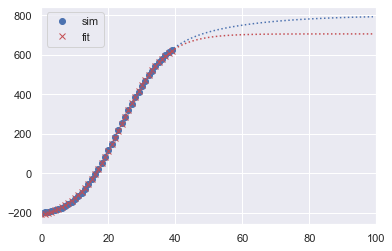

In [86]:
parameters, pcov = curve_fit(modelo, p, v, method='trf',bounds=bounds, p0=p0)
v_fit = modelo(p,*parameters)
plt.plot(p,v,'bo',label='sim')
plt.plot(p,v_fit,'rx',label='fit')
p_sim = np.array(range(0,100))
v_sim = m.sigmoid_recruit_units(p_sim,*param)
v_fit_curva = modelo(p_sim,*parameters)
plt.plot(p_sim,v_sim,'b:')
plt.plot(p_sim,v_fit_curva,'r:')
plt.xlim((0,100))
plt.legend()
print(parameters)